In [1]:
from pandas import read_csv, DataFrame
from numpy import ndarray
from matplotlib.pyplot import figure, show, savefig
from sklearn.model_selection import train_test_split

from dslab_functions import get_variable_types, run_NB, run_KNN, CLASS_EVAL_METRICS, plot_multibar_chart

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval

# read file
filename = "class_pos_covid.csv"
file_tag = "class_pos_covid"
data : DataFrame = read_csv('class_pos_covid.csv')
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [2]:
# cleaning
'''
def data_cleaning(df: DataFrame):
    variable_types: dict[str, list] = get_variable_types(df)
    
    # Age
    df['Age'] = to_numeric(df['Age'], errors='coerce')
    df['Age'] = np.where((df['Age'].isnull()) | (df['Age'] < 0) | (df['Age'] > 120), np.nan, df['Age'])
    
    # Monthly Balance
    df['MonthlyBalance'] = df['MonthlyBalance'].replace(-3.33333E+26, np.nan)
    
    # Num_Bank_Accounts
    df['Num_Bank_Accounts'] = np.where(df['Num_Bank_Accounts'] < 0, np.nan, df['Num_Bank_Accounts'])
    
    # NumofLoan
    df['NumofLoan'] = np.where(df['NumofLoan'] < 0, np.nan, df['NumofLoan'])
    
    # Delay_from_due_date
    df['Delay_from_due_date'] = np.where(df['Delay_from_due_date'] < 0, np.nan, df['Delay_from_due_date'])
    
    # NumofDelayedPayment
    df['NumofDelayedPayment'] = np.where(df['NumofDelayedPayment'] < 0, np.nan, df['NumofDelayedPayment'])
    
    # ChangedCreditLimit
    df['ChangedCreditLimit'] = np.where(df['ChangedCreditLimit'] < 0, np.nan, df['ChangedCreditLimit'])
    
data_cleaning(data)
'''
columns = ['ID']
existing_columns = [col for col in columns if col in data.columns]
if len(existing_columns) > 0:
    data.drop(columns = existing_columns, inplace = True)

vars: dict[str, list] = get_variable_types(data)
for v in vars["symbolic"]:
    print(v, data[v].unique())

State ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
GeneralHealth ['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
LastCheckupTime ['Within past year (anytime less than 12 months ago)' nan
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
RemovedTeeth [nan 'None of them' '1 to 5' '6 or more, but not all' 'Al

# VARIABLE ENCODING

- ID: drop
- Binary vars: ole              
- State: oebt			
- GeneralHealth: ole						
- LastCheckUpTime: ole					
- SmokerStatus:	ole					
- ECigaretteUsage: ole					
- RaceEthnicityCategory: ole						
- AgeCategory: ole			
- TetanusLast10Tdap: ole

haddiabetes and removedteeth missing from forms!

### BINARY

In [3]:
# encode binary
yes_no: dict[str, int] = {"no": 0, "No": 0, "yes": 1, "Yes": 1}
fem_male: dict[str, int] = {"female": 0, "Female": 0, "male": 1, "Male": 1}

encoding: dict[str, dict[str, int]] = {
    "CovidPos": yes_no,
    "PhysicalActivities": yes_no,
    "HadHeartAttack": yes_no,
    "HadAngina": yes_no,
    "HadStroke": yes_no,
    "HadAsthma": yes_no,
    "HadSkinCancer": yes_no,
    "HadCOPD": yes_no,
    "HadDepressiveDisorder": yes_no,
    "HadKidneyDisease": yes_no,
    "HadArthritis": yes_no,
    "DeafOrHardOfHearing": yes_no,
    "BlindOrVisionDifficulty": yes_no,
    "DifficultyConcentrating": yes_no,
    "DifficultyWalking": yes_no,
    "DifficultyDressingBathing": yes_no,
    "DifficultyErrands": yes_no,
    "ChestScan": yes_no,
    "AlcoholDrinkers": yes_no,
    "HIVTesting": yes_no,
    "FluVaxLast12": yes_no,
    "PneumoVaxEver": yes_no,
    "HighRiskLastYear": yes_no,
    "Sex": fem_male,
}

### SYMBOLIC

In [4]:
#encode symbolic
state_gdp: dict[str, float] = {
    'Alabama': 54.753,
    'Alaska': 86.722,
    'Arizona': 62.365,
    'Arkansas': 54.259,
    'California': 92.190,
    'Colorado': 82.954,
    'Connecticut': 88.760,
    'Delaware': 85.977,
    'District of Columbia': 242.853,
    'Florida': 62.446,
    'Georgia': 69.253,
    'Hawaii': 68.207,
    'Idaho': 56.496,
    'Illinois': 82.126,
    'Indiana': 66.698,
    'Iowa': 72.221,
    'Kansas': 71.729,
    'Kentucky': 57.653,
    'Louisiana': 61.313,
    'Maine': 61.008,
    'Maryland': 76.279,
    'Massachusetts': 98.609,
    'Michigan': 61.859,
    'Minnesota': 78.100,
    'Mississippi': 47.190,
    'Missouri': 63.126,
    'Montana': 57.945,
    'Nebraska': 82.207,
    'Nevada': 67.962,
    'New Hampshire': 75.565,
    'New Jersey': 80.490,
    'New Mexico': 57.792,
    'New York': 104.344,
    'North Carolina': 68.243,
    'North Dakota': 94.021,
    'Ohio': 69.978,
    'Oklahoma': 59.894,
    'Oregon': 70.548,
    'Pennsylvania': 71.160,
    'Rhode Island': 65.362,
    'South Carolina': 56.066,
    'South Dakota': 74.268,
    'Tennessee': 67.473,
    'Texas': 78.456,
    'Utah': 73.424,
    'Vermont': 62.771,
    'Virginia': 74.789,
    'Washington': 93.193,
    'West Virginia': 53.852,
    'Wisconsin': 68.192,
    'Wyoming': 81.586,
    'Guam': 34.624,
    'Puerto Rico': 31.429,
    'Virgin Islands': 39.552
}
encoding["State"] = state_gdp

def apply_encoding(df: DataFrame):
    df['GeneralHealth'] = df.apply(lambda x: 1 if x["GeneralHealth"] == "Poor"
                               else 2 if x["GeneralHealth"] == "Fair"
                               else 3 if x["GeneralHealth"] == "Good"
                               else 4 if x["GeneralHealth"] == "Very good"
                               else 5 if x["GeneralHealth"] == "Excellent"
                               else None, axis=1)

    df['LastCheckupTime'] = df.apply(lambda x: 0.1 if x["LastCheckupTime"] == "Within past year (anytime less than 12 months ago)"
                                else 1.2 if x["LastCheckupTime"] == "Within past 2 years (1 year but less than 2 years ago)"
                                else 2.5 if x["LastCheckupTime"] == "Within past 5 years (2 years but less than 5 years ago)"
                                else 5 if x["LastCheckupTime"] == "5 or more years ago"
                                else None, axis=1)

    df['RemovedTeeth'] = df.apply(lambda x: 0 if x["RemovedTeeth"] == "None of them"
                                else 1.5 if x["RemovedTeeth"] == "1 to 5"
                                else 6.32 if x["RemovedTeeth"] == "6 or more, but not all"
                                else 32 if x["RemovedTeeth"] == "All"
                                else None, axis=1)

    df['HadDiabetes'] = df.apply(lambda x: 0 if x["HadDiabetes"] == "No"
                                else 1 if x["HadDiabetes"] == "No, pre-diabetes or borderline diabetes"
                                else 2 if x["HadDiabetes"] == "Yes, but only during pregnancy (female)"
                                else 3 if x["HadDiabetes"] == "Yes"
                                else None, axis=1)

    df['SmokerStatus'] = df.apply(lambda x: 0 if x["SmokerStatus"] == "Never smoked"
                                else 1 if x["SmokerStatus"] == "Former smoker"
                                else 2 if x["SmokerStatus"] == "Current smoker - now smokes some days"
                                else 3 if x["SmokerStatus"] == "Current smoker - now smokes every day"
                                else None, axis=1)

    df['ECigaretteUsage'] = df.apply(lambda x: 0 if x["ECigaretteUsage"] == "Never used e-cigarettes in my entire life"
                                else 1 if x["ECigaretteUsage"] == "Not at all (right now)"
                                else 2 if x["ECigaretteUsage"] == "Use them some days"
                                else 3 if x["ECigaretteUsage"] == "Use them every day"
                                else None, axis=1)

    df['RaceEthnicityCategory'] = df.apply(lambda x: 0 if x["RaceEthnicityCategory"] == "Hispanic"
                                else 1 if x["RaceEthnicityCategory"] == "White only, Non-Hispanic"
                                else 2 if x["RaceEthnicityCategory"] == "Black only, Non-Hispanic"
                                else 3 if x["RaceEthnicityCategory"] == "Multiracial, Non-Hispanic"
                                else 4 if x["RaceEthnicityCategory"] == "Other race only, Non-Hispanic"
                                else None, axis=1)

    df['AgeCategory'] = df.apply(lambda x: 18.24 if x["AgeCategory"] == "Age 18 to 24"
                                else 25.29 if x["AgeCategory"] == "Age 25 to 29"
                                else 30.34 if x["AgeCategory"] == "Age 30 to 34"
                                else 35.39 if x["AgeCategory"] == "Age 35 to 39"
                                else 40.44 if x["AgeCategory"] == "Age 40 to 44"
                                else 45.49 if x["AgeCategory"] == "Age 45 to 49"
                                else 50.54 if x["AgeCategory"] == "Age 50 to 54"
                                else 55.59 if x["AgeCategory"] == "Age 55 to 59"
                                else 60.64 if x["AgeCategory"] == "Age 60 to 64"
                                else 65.69 if x["AgeCategory"] == "Age 65 to 69"
                                else 70.74 if x["AgeCategory"] == "Age 70 to 74"
                                else 75.79 if x["AgeCategory"] == "Age 75 to 79"
                                else 80 if x["AgeCategory"] == "Age 80 or older"
                                else None, axis=1)
    if 'TetanusLast10Tdap' in df.columns:
        df['TetanusLast10Tdap'] = df.apply(lambda x: 0 if x["TetanusLast10Tdap"] == "No, did not receive any tetanus shot in the past 10 years"
                                else 1 if x["TetanusLast10Tdap"] == "Yes, received tetanus shot but not sure what type"
                                else 2 if x["TetanusLast10Tdap"] == "Yes, received tetanus shot, but not Tdap"
                                else 3 if x["TetanusLast10Tdap"] == "Yes, received Tdap"
                                else None, axis=1)

# MISSING VALUES IMPUTATION

Dataset nr records=380932 nr variables=40


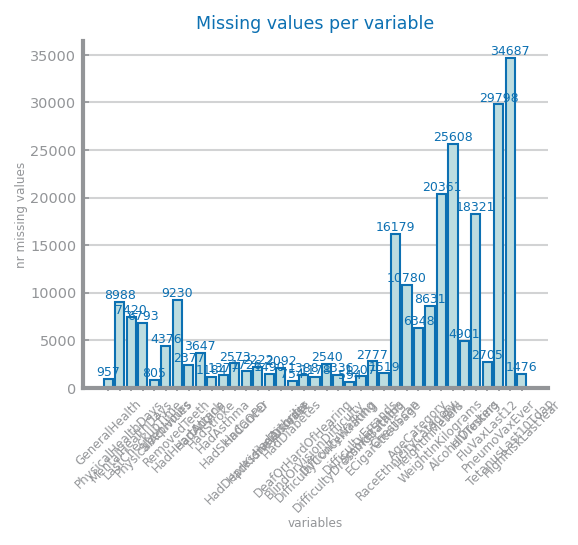

In [5]:
from dslab_functions import mvi_by_dropping, mvi_by_filling
from dslab_functions import plot_bar_chart

print(f"Dataset nr records={data.shape[0]}", f"nr variables={data.shape[1]}")

mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

### MVI FIRST APPROACH - dropping variables with >5% mv and records with >30% mv then imputing with median

In [ ]:
df: DataFrame = mvi_by_dropping(data, min_pct_per_variable=0.95, min_pct_per_record=0.7)
print(df.shape)

df: DataFrame = mvi_by_filling(df, strategy="frequent")
df.head()

In [ ]:
# apply encoding
df: DataFrame = df.replace(encoding, inplace=False)
apply_encoding(df)
#df

In [ ]:
target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

Xtrain['CovidPos'] = Ytrain
Xtest['CovidPos'] = Ytest
train, test = Xtrain, Xtest

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/missing_values/eval_approach1.png")
show()

df.to_csv(f"data/{file_tag}/data_preparation/missing_values/eval_approach1.csv", index=True)

### MVI SECOND APPROACH - dropping variables with >10% mv and records with >90% mv then imputing with median

In [6]:
df: DataFrame = mvi_by_dropping(data, min_pct_per_variable=0.90, min_pct_per_record=0.9)
print(df.shape)

# change to mean
df: DataFrame = mvi_by_filling(df, strategy="frequent")
df.head()

(375892, 40)


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State,GeneralHealth,LastCheckupTime,RemovedTeeth,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0.0,0.0,8.0,1.70,81.19,27.44,Alabama,Very good,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,No,No,No,Yes,No,No,No
1,0.0,0.0,6.0,1.60,68.04,26.57,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,No,No,No,No,No,No,No
2,0.0,0.0,7.0,1.65,63.50,23.30,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,Yes,No,No,Yes,Yes,No,No
3,2.0,0.0,9.0,1.57,53.98,21.77,Alabama,Fair,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,Yes,Yes,No,No,Yes,No,No
4,1.0,0.0,7.0,1.80,84.82,26.08,Alabama,Poor,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,No,No,No,No,Yes,No,No


In [7]:
# apply encoding
df: DataFrame = df.replace(encoding, inplace=False)
apply_encoding(df)
#df

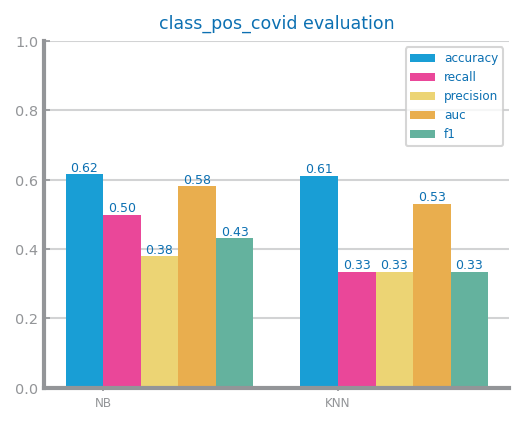

In [8]:
target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

Xtrain['CovidPos'] = Ytrain
Xtest['CovidPos'] = Ytest
train, test = Xtrain, Xtest

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/missing_values/eval_approach2.png")
show()

df.to_csv(f"data/{file_tag}/data_preparation/missing_values/eval_approach2.csv", index=True)

### DROP OUTLIERS

In [ ]:
from pandas import read_csv, DataFrame, Series

from dslab_functions import NR_STDEV, get_variable_types, determine_outlier_thresholds_for_var

file_tag = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/missing_values/eval_approach2.csv')
print(f"Original data: {data.shape}")

n_std: int = NR_STDEV
numeric_vars: list[str] = get_variable_types(data)["numeric"]
if numeric_vars is not None:
    df: DataFrame = data.copy(deep=True)
    summary5: DataFrame = data[numeric_vars].describe()
    for var in numeric_vars:
        top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
            summary5[var], True, 4
        )
        outliers: Series = df[(df[var] > top_threshold) | (df[var] < bottom_threshold)]
        df.drop(outliers.index, axis=0, inplace=True)
    df.to_csv(f"data/{file_tag}/data_preparation/outliers/drop_outliers.csv", index=True)
    print(f"Data after dropping outliers: {df.shape}")
else:
    print("There are no numeric variables")

df.describe()

### REPLACING OUTLIERS WITH FIXED VALUES

In [ ]:
file_tag = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/missing_values/eval_approach2.csv')
print(f"Original data: {data.shape}")

if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var],True, 4)
        median: float = df[var].median()
        df[var] = df[var].apply(lambda x: median if x > top or x < bottom else x)
    df.to_csv(f"data/{file_tag}/data_preparation/outliers/replacing_outliers.csv", index=True)
    print("Data after replacing outliers:", df.shape)
    print(df.describe())
else:
    print("There are no numeric variables")

### TRUNCATING OUTLIERS

In [ ]:
file_tag = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/missing_values/eval_approach2.csv')
print(f"Original data: {data.shape}")

if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var], True, 4)
        df[var] = df[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    df.to_csv(f"data/{file_tag}/data_preparation/outliers/truncate_outliers.csv", index=True)
    print("Data after truncating outliers:", df.shape)
    print(df.describe())
else:
    print("There are no numeric variables")

# SCALING

### Z-SCORE

In [ ]:
def evaluate_knn(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    #eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = eval_KNN[met]
    return eval


target = 'CovidPos'
X, y = df_zscore.loc[:, df_zscore.columns != 'CovidPos'], df_zscore['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

Xtrain['CovidPos'] = Ytrain
Xtest['CovidPos'] = Ytest
train, test = Xtrain, Xtest

figure()
eval: dict[str, list] = evaluate_knn(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/scaling/zscore.png")
show()

### MINMAX SCALER

In [ ]:
def evaluate_knn(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    #eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = eval_KNN[met]
    return eval

target = 'CovidPos'
X, y = df_minmax.loc[:, df_minmax.columns != 'CovidPos'], df_minmax['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

Xtrain['CovidPos'] = Ytrain
Xtest['CovidPos'] = Ytest
train, test = Xtrain, Xtest

figure()
eval: dict[str, list] = evaluate_knn(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/scaling/minmax.png")
show()

### NO SCALING

In [ ]:
def evaluate_knn(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    #eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = eval_KNN[met]
    return eval

target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

Xtrain['CovidPos'] = Ytrain
Xtest['CovidPos'] = Ytest
train, test = Xtrain, Xtest

figure()
eval: dict[str, list] = evaluate_knn(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/scaling/no_scaling.png")
show()

### COMPARE ORIGINAL TO ZSCORE AND MINMAX

# BALANCING

In [ ]:
from pandas import read_csv, concat, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslab_functions import plot_bar_chart

file = "class_pos_covid"
target = "CovidPos"
original: DataFrame = read_csv('data/class_pos_covid/data_preparation/scaling/no_scaling.csv')

target_count: Series = original[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

print("Minority class=", positive_class, ":", target_count[positive_class])
print("Majority class=", negative_class, ":", target_count[negative_class])
print(
    "Proportion:",
    round(target_count[positive_class] / target_count[negative_class], 2),
    ": 1",
)
values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(target_count.index.to_list(), target_count.to_list(), title="Class balance")
show()

### UNDERSAMPLING

In [ ]:
df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives)))
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)
df_under.to_csv(f"data/{file}/data_preparation/balancing/undersampling.csv", index=False)

print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")

### OVERSAMPLING

In [ ]:
df_pos_sample: DataFrame = DataFrame(
    df_positives.sample(len(df_negatives), replace=True)
)
df_over: DataFrame = concat([df_pos_sample, df_negatives], axis=0)
df_over.to_csv(f"data/{file}/data_preparation/balancing/oversampling.csv", index=False)

print("Minority class=", positive_class, ":", len(df_pos_sample))
print("Majority class=", negative_class, ":", len(df_negatives))
print("Proportion:", round(len(df_pos_sample) / len(df_negatives), 2), ": 1")

### SMOTE (need encoding first)

In [ ]:
from numpy import ndarray
from pandas import Series
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

smote: SMOTE = SMOTE(sampling_strategy="minority", random_state=RANDOM_STATE)
y = original.pop(target).values
X: ndarray = original.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote: DataFrame = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(original.columns) + [target]
df_smote.to_csv(f"data/{file}/data_preparation/balancing/smote.csv", index=False)

smote_target_count: Series = Series(smote_y).value_counts()
print("Minority class=", positive_class, ":", smote_target_count[positive_class])
print("Majority class=", negative_class, ":", smote_target_count[negative_class])
print(
    "Proportion:",
    round(smote_target_count[positive_class] / smote_target_count[negative_class], 2),
    ": 1",
)
print(df_smote.shape)